<a href="https://colab.research.google.com/github/balogz/Building-a-Simple-Chatbot-in-Python-using-NLTK/blob/master/4211assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sys.path.append('/content/gdrive/mypythondirectory')

NameError: ignored

In [ ]:
### Libraries Import
#import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tools_4211_2122 as ts
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import scipy.optimize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1 (a). - Clustering

Confusion matrix for evaluating the clustering algorithm

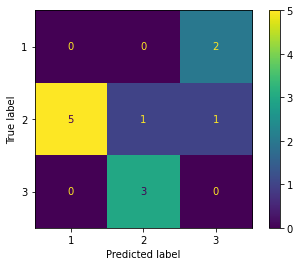

In [ ]:
Cluster_labels = [1, 2, 2, 1, 1, 1, 3, 2, 2, 1, 3, 3]
True_labels = [2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1]
ConfusionMatrixDisplay.from_predictions(True_labels, Cluster_labels)
plt.show()


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DataHOG_PCA20.csv',header=None)
df2 = pd.read_csv('/content/drive/MyDrive/DataLBP_PCA20.csv',header=None)
df3 = pd.read_csv('/content/drive/MyDrive/DataRGB_PCA20.csv',header=None)
lbl = pd.read_csv('/content/drive/MyDrive/Labels.csv',header=None)

print(lbl.value_counts())

HOG = df1.to_numpy()
LBP = df2.to_numpy()
RGB = df3.to_numpy()
Labels =lbl.to_numpy()



3    114
1    102
2    100
dtype: int64


In [ ]:
def confusion_matrix(t,a):

  ut = np.unique(t)
  ul =len(ut)
  cm = np.zeros((ul,ul))
  for i in range(ul):
    for j in range(ul):
      cm[i,j] = np.sum((t==ut[i]) & (a==ut[j]))
  return cm,ut

def label_matcher(t,a):
	from scipy.optimize import linear_sum_assignment
	cm,ut = confusion_matrix(t,a)
	ri,ci = linear_sum_assignment(-cm) # get optional labels
	na =np.zeros(len(a)) # relabel the assigned
	for i in range(len(ut)):
		na[a==ut[ci[i]]]=ut[ri[i]]
	conf,_ = confusion_matrix(t,na)
	return np.trace(conf)/np.sum(conf) #accuracy

In [ ]:
from sklearn.cluster import KMeans # 
my_km = KMeans(n_clusters = 3)
my_km.fit(HOG)
my_labels_km1 = my_km.labels_ #predicted label
#print(my_labels_km1.value_counts())
unique, counts = np.unique(my_labels_km1, return_counts=True)
print( np.asarray((unique, counts)).T)
accuracy = label_matcher(Labels,my_labels_km1)
print('Kmeans Accuracy of data_HOG =', accuracy)


[[  0 105]
 [  1 107]
 [  2 104]]
Kmeans Accuracy of data_HOG = 0.34204211410402546


In [ ]:
my_km.fit(LBP)
my_labels_km2 = my_km.labels_
accuracy = label_matcher(Labels,my_labels_km2)
print('Kmeans Accuracy of data_LBP =', accuracy)


Kmeans Accuracy of data_LBP = 0.3419496036909973


In [ ]:
my_km.fit(RGB)
my_labels_km3 = my_km.labels_
accuracy = label_matcher(Labels,my_labels_km3)
print('Kmeans Accuracy of data_RGB =', accuracy)


Kmeans Accuracy of data_RGB = 0.3418612943483687


In [ ]:
from sklearn.cluster import AgglomerativeClustering
my_sl = AgglomerativeClustering(linkage = 'single',n_clusters = 3)
my_sl.fit(HOG)
my_labels_sl1 = my_sl.labels_
accuracy = label_matcher(Labels,my_labels_sl1)
print('Slinkage Accuracy of data_HOG =', accuracy)

Slinkage Accuracy of data_HOG = 0.34177215189873417


In [ ]:
my_sl.fit(LBP)
my_labels_sl2 = my_sl.labels_
accuracy = label_matcher(Labels,my_labels_sl2)
print('Slinkage Accuracy of data_LBP =', accuracy)


Slinkage Accuracy of data_LBP = 0.34177215189873417


In [ ]:
my_sl.fit(RGB)
my_labels_sl3 = my_sl.labels_
accuracy = label_matcher(Labels,my_labels_sl3)
print('Slinkage Accuracy of data_RGB =', accuracy)


Slinkage Accuracy of data_RGB = 0.34177215189873417


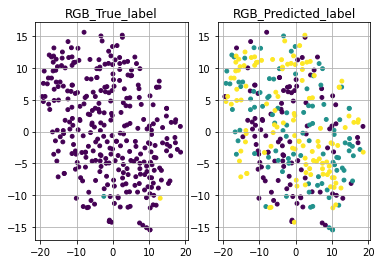

In [ ]:
#T-SNE 
from sklearn.manifold import TSNE

RGB_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(RGB) #
RGB_embedded.shape

plt.figure()
plt.subplot(1,2,1)
plt.scatter(RGB_embedded[:,0],RGB_embedded[:,1],c = my_labels_sl3,s=15) # TSNE with RGB_true labels
plt.title('RGB_True_label')
plt.axis('on')
plt.grid('equal')

plt.subplot(1,2,2)
plt.scatter(RGB_embedded[:,0],RGB_embedded[:,1],c = Labels,s=15) # TSNE with RGB_Preidcted labels
plt.title('RGB_Predicted_label')
plt.axis('on')
plt.grid('equal')
plt.show()





In [ ]:
feature_set = (1,2,3,4,5,6)

def subset_quality(feature_set):
    feature_set = np.array(feature_set)
    u = np.sum(np.sin(feature_set) + \
	np.cos(feature_set))
    return u

print('feature_set 1 =',subset_quality(1))
print('feature_set 2 =',subset_quality(2))
print('feature_set 3 =',subset_quality(3))
print('feature_set 4 =',subset_quality(4))
print('feature_set 5 =',subset_quality(5))
print('feature_set 6 =',subset_quality(6))

print('The feature selected is feature [1] because it gives the maximum subset_quality')

print('Selecting the second features')

feature_set = ([1,2],[1,3],[1,4],[1,5],[1,6])
print('feature_set 1,2 =',subset_quality([1,2]))
print('feature_set 1,3 =',subset_quality([1,3]))
print('feature_set 1,4 =',subset_quality([1,4]))
print('feature_set 1,5 =',subset_quality([1,5]))
print('feature_set 1,6 =',subset_quality([1,6]))



print('The feature selected is feature [1,6] because it gives the maximum subset_quality')

print('Selecting the 3rd features')

feature_set = ([1,6,1],[1,6,2],[1,6,3],[1,6,4],[1,6,5])
print('feature_set 1,6,1 =',subset_quality([1,6,1]))
print('feature_set 1,6,2 =',subset_quality([1,6,2]))
print('feature_set 1,6,3 =',subset_quality([1,6,3]))
print('feature_set 1,6,4 =',subset_quality([1,6,4]))
print('feature_set 1,6,5 =',subset_quality([1,6,5]))

print('The feature selected is feature [1,6,1] because it gives the maximum subset_quality')




feature_set 1 = 1.3817732906760363
feature_set 2 = 0.4931505902785393
feature_set 3 = -0.8488724885405782
feature_set 4 = -1.4104461161715403
feature_set 5 = -0.6752620891999122
feature_set 6 = 0.6807547884514401
The feature selected is feature [1] because it gives the maximum subset_quality
Selecting the second features
feature_set 1,2 = 1.8749238809545756
feature_set 1,3 = 0.5329008021354581
feature_set 1,4 = -0.028672825495503984
feature_set 1,5 = 0.7065112014761241
feature_set 1,6 = 2.0625280791274765
The feature selected is feature [1,6] because it gives the maximum subset_quality
Selecting the 3rd features
feature_set 1,6,1 = 3.4443013698035125
feature_set 1,6,2 = 2.555678669406016
feature_set 1,6,3 = 1.2136555905868982
feature_set 1,6,4 = 0.6520819629559362
feature_set 1,6,5 = 1.3872659899275643
The feature selected is feature [1,6,1] because it gives the maximum subset_quality


In [ ]:
print(Labels.shape)

(316, 1)


In [ ]:
print(my_labels_sl3[110:120])


#3B
from sklearn.model_selection import train_test_split
trd, tsd, trl, tsl = train_test_split(HOG, Labels, test_size = 0.5)


    
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes =[15,30,50,100,800]
for i in range (len(hidden_layer_sizes)):
    clf = MLPClassifier(hidden_layer_sizes[i] , \
    random_state=1, max_iter=1300).fit(trd, trl)

    assigned_labels = clf.predict(tsd)
    error_rate = np.mean(tsl != assigned_labels)
print('Hold-out error rate of the HOG  = %.4f' % error_rate)




'''

#clf1 = MLPClassifier(hidden_layer_sizes =[15,30,50,100,800] , \
#random_state=1, max_iter=1300).fit(trd1, trl1)

assigned_labels = clf1.predict(tsd)
error_rate = np.mean(tsl1 != assigned_labels)
print('Error rate of the HOG  = %.4f' % error_rate)

holdout, _, _  = ts.train_test_tree(trd,trl,tsd,tsl)
print('Hold-out error = ',holdout)

holdout, _, _  = ts.train_test_tree(trd,trl,tsd,tsl)
print('Hold-out error = ',holdout)

resub, _, _  = ts.train_test_tree(HOG,Labels,HOG,Labels)
print('Resubstitution error = ',resub)

'''


[0 0 1 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

Hold-out error rate of the HOG  = 0.6686


"\n\n#clf1 = MLPClassifier(hidden_layer_sizes =[15,30,50,100,800] , #random_state=1, max_iter=1300).fit(trd1, trl1)\n\nassigned_labels = clf1.predict(tsd)\nerror_rate = np.mean(tsl1 != assigned_labels)\nprint('Error rate of the HOG  = %.4f' % error_rate)\n\nholdout, _, _  = ts.train_test_tree(trd,trl,tsd,tsl)\nprint('Hold-out error = ',holdout)\n\nholdout, _, _  = ts.train_test_tree(trd,trl,tsd,tsl)\nprint('Hold-out error = ',holdout)\n\nresub, _, _  = ts.train_test_tree(HOG,Labels,HOG,Labels)\nprint('Resubstitution error = ',resub)\n\n"

In [ ]:
import numpy as np
subset_quality([1, 6, 2])

2.555678669406016

Carry out a study on an MLP classifier using the HOG data and the RGB data from Problem 1b.
To run the classifier, you can use:
from sklearn.neural_network import MLPClassifier clf = MLPClassifier(hidden_layer_sizes = XXX, \
random_state=1, max_iter=1300).fit(hog, Labels)
Calculate the resubstitution error and the hold-out error for number of neurons at the (single) hidden layer: [15,30,50,100,800]. Present the results in your report and give a comment.
Expected in the report: Good presentation of results. [18]
Comment – for both data sets, larger NN leads to better accuracy. HOG features are a lot better than RGB features

In [ ]:
def train_test_MLP(training_data,training_labels, \
                        testing_data,testing_labels, hl):
    """
    Trains and tests a MLP classifier.
    Returns the classification error, the predicted labels and the classifier.
    """
    cla = MLPClassifier(hidden_layer_sizes = hl, random_state=1, max_iter=1300)
    # Train the classifier with data and labels
    cla.fit(training_data, training_labels)
    assigned_labels = cla.predict(testing_data)
    testing_error = np.mean(testing_labels != assigned_labels)
    #assigned_labels_Tr = cla.predict(testing_data)
    #training_error = np.mean(training_labels != assigned_labels_Tr )
    #return testing_error, training_error
    #return testing_error
    return testing_error, assigned_labels, cla

## Question 3b

### Initialisation and Loading

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

HOG = df1.to_numpy()
RGB = df3.to_numpy()


### Train HOG

In [ ]:
HL = [15,30,50,100,800]

X_train, X_test, y_train, y_test = train_test_split(HOG, Labels, test_size = 0.3)
#rsltTr = []
#rsltTs = []
for hl in HL:
  #testEr, trainEr = train_test_MLP(X_train, y_train, X_test, y_test, hl)
  holdout,_,_ = train_test_MLP(X_train, y_train, X_test, y_test, hl)
  #rsltTr.append(round(trainEr, 2)) 
  #rsltTs.append(round(testEr, 2))
print(holdout)

#fig = plt.figure()
#ax = plt.axes()

#ax.plot(rsltTr);
#ax.plot(rsltTs);

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

0.6591689750692521


## Train RGB

In [ ]:
def train_test_MLP(training_data,training_labels, \
                        testing_data,testing_labels, hl):
    """
    Trains and tests a MLP classifier.
    Returns the classification error, the predicted labels and the classifier.
    """
    cla = MLPClassifier(hidden_layer_sizes = hl, random_state=1, max_iter=1300)
    # Train the classifier with data and labels
    cla.fit(training_data, training_labels)
    assigned_labels = cla.predict(testing_data)
    testing_error = np.mean(testing_labels != assigned_labels)
    return testing_error, assigned_labels, cla

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

HOG = df1.to_numpy()
RGB = df3.to_numpy()

resub errro for RGB

In [ ]:
HL = [15,30,50,100,800]

X_train, X_test, y_train, y_test = train_test_split(RGB, Labels, test_size = 0.5)
for hl in HL:
  holdout,_,_ = train_test_MLP(X_train, y_train, X_test, y_test, hl)
print('holdout error',holdout) 

resub, _, _  = train_test_MLP(RGB,Labels,RGB,Labels,hl)
print('resub error = ',resub)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

holdout error 0.6660390962986701


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


resub error =  0.6655183464188431


In [ ]:
HL = [15,30,50,100,800]

X_train1, X_test1, y_train1, y_test1 = train_test_split(HOG, Labels, test_size = 0.5)
for hl in HL:
  holdout,_,_ = train_test_MLP(X_train1, y_train1, X_test1, y_test1, hl)
print('holdout error',holdout) 

resub, _, _  = train_test_MLP(HOG,Labels,HOG,Labels,hl)
print('resub error HOG = ',resub)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

holdout error 0.6673609998397693


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


resub error HOG =  0.6655183464188431
